<a href="https://colab.research.google.com/github/haraharaman/learning/blob/main/python100knocks/4%E7%AB%A0_%E9%A1%A7%E5%AE%A2%E3%81%AE%E8%A1%8C%E5%8B%95%E3%82%92%E4%BA%88%E6%B8%AC%E3%81%99%E3%82%8B10%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
# Google Driveと接続を行います。これを行うことで、Driveにあるデータにアクセスできるようになります。
# 下記セルを実行すると、Googleアカウントのログインを求められますのでログインしてください。
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
# 作業フォルダへの移動を行います。
# 人によって作業場所がことなるので、その場合作業場所を変更してください。
import os 
os.chdir('/content/drive/MyDrive/勉強/Colab Notebooks/100knock-data_analytics/4章') #ここを変更。

# 4章 顧客の全体像を把握する１０本ノック

引き続き、スポーツジムの会員データを使って顧客の行動を分析していきます。  
３章で顧客の全体像を把握しました。  
ここからは、機械学習を用いて顧客のグループ化や顧客の利用予測行なっていきましょう。  
ここでは、教師なし学習、教師あり学習の回帰を取り扱います。

### ノック31：データを読み込んで確認しよう

In [155]:
import pandas as pd
customer = pd.read_csv("customer_join.csv")
customer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaN,CA1,0,オールタイム,10500,通常,8.000000,8.0,8,8,0,2019-04-30,1
4188,HD246549,XXXXX,C01,F,2019-03-14,NaN,CA1,0,オールタイム,10500,通常,10.000000,10.0,10,10,0,2019-04-30,1
4189,GD037007,XXXXX,C03,M,2019-03-14,NaN,CA1,0,ナイト,6000,通常,8.000000,8.0,8,8,0,2019-04-30,1
4190,OA953150,XXXXX,C01,M,2019-03-14,NaN,CA1,0,オールタイム,10500,通常,11.000000,11.0,11,11,0,2019-04-30,1


In [156]:
log = pd.read_csv("use_log.csv")
log

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01
...,...,...,...
197423,L00000049209753,TS977703,2019-03-31
197424,L00000049209754,TS979550,2019-03-31
197425,L00000049209755,TS995299,2019-03-31
197426,L00000049209756,TS995853,2019-03-31


In [157]:
print(log.isnull().sum())
print(customer.isnull().sum())

log_id         0
customer_id    0
usedate        0
dtype: int64
customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
dtype: int64


### ノック32：クラスタリングで顧客をグループ化しよう

In [158]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#データの標準化
scaler = StandardScaler()
data = scaler.fit_transform(customer[["mean","median","max","min","membership_period"]])

#クラスタリングを行い、結果をもとのCSVに追加
kmeans = KMeans(n_clusters=4, random_state=0)
customer["cluster_id"] =  kmeans.fit_predict(data)

customer

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,cluster_id
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30,47,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30,47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaN,CA1,0,オールタイム,10500,通常,8.000000,8.0,8,8,0,2019-04-30,1,0
4188,HD246549,XXXXX,C01,F,2019-03-14,NaN,CA1,0,オールタイム,10500,通常,10.000000,10.0,10,10,0,2019-04-30,1,0
4189,GD037007,XXXXX,C03,M,2019-03-14,NaN,CA1,0,ナイト,6000,通常,8.000000,8.0,8,8,0,2019-04-30,1,0
4190,OA953150,XXXXX,C01,M,2019-03-14,NaN,CA1,0,オールタイム,10500,通常,11.000000,11.0,11,11,0,2019-04-30,1,0


### ノック33：クラスタリング結果を分析しよう

In [159]:
result = customer[["mean","median","max","min","membership_period","cluster_id"]]


In [160]:
result.groupby("cluster_id").count()

,mean,median,max,min,membership_period
cluster_id,,,,,
0,840,840,840,840,840
1,1249,1249,1249,1249,1249
2,771,771,771,771,771
3,1332,1332,1332,1332,1332


### ノック34：クラスタリング結果を可視化してみよう

In [161]:
#分析結果を主成分分析で二軸に変換する
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
embed = pca.fit_transform(result)
embed = pd.DataFrame(embed)

#もとのクラスタリング結果と紐づける
embed["cluster_id"] = result["cluster_id"]
embed.head

<bound method NDFrame.head of               0         1  cluster_id
0     28.166833  1.223410           1
1     28.134686  1.268174           1
2     28.178423  0.499632           1
3     28.207888  0.447074           1
4     28.330508 -1.224599           1
...         ...       ...         ...
4187 -18.197372  4.077117           0
4188 -18.477021  8.010271           0
4189 -18.197372  4.077117           0
4190 -18.616846  9.976848           0
4191 -18.477021  8.010271           0

[4192 rows x 3 columns]>

<Axes: xlabel='0', ylabel='1'>

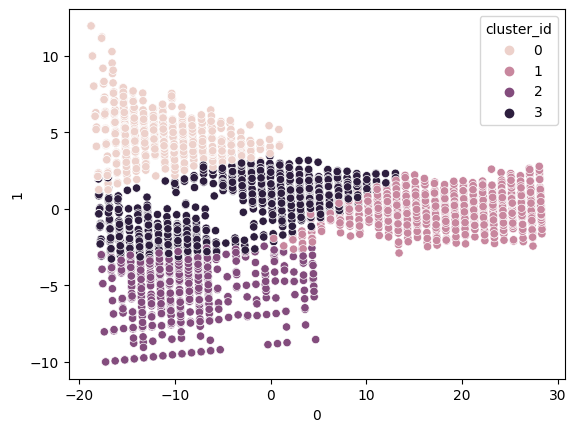

In [162]:
#二軸の特徴量とクラスタリングをグラフ化する
import seaborn as sns
sns.scatterplot(x=0,y=1,hue="cluster_id", data=embed)

### ノック35：クラスタリング結果をもとに退会顧客の傾向を把握しよう

In [163]:
customer.groupby(["cluster_id","is_deleted"], as_index=False).agg(["count","mean"])[["mean","median","max","min","routine_flg","membership_period"]]

<ipython-input-163-d17b74a71d4a>:1: FutureWarning: ['customer_id', 'name', 'class', 'gender', 'start_date', 'end_date', 'campaign_id', 'class_name', 'campaign_name', 'calc_date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  customer.groupby(["cluster_id","is_deleted"], as_index=False).agg(["count","mean"])[["mean","median","max","min","routine_flg","membership_period"]]


mean           median             max              min  \
                      count      mean  count      mean count       mean count   
cluster_id is_deleted                                                           
0          0            821  8.081849    821  8.071864   821  10.032887   821   
           1             19  7.201754     19  6.973684    19   9.210526    19   
1          0           1231  4.686840   1231  4.679529  1231   7.239643  1231   
           1             18  4.042985     18  4.083333    18   6.833333    18   
2          1            771  3.065504    771  2.900130   771   4.783398   771   
3          0            790  5.991621    790  5.991772   790   8.767089   790   
           1            542  4.880589    542  4.515683   542   8.739852   542   

                                routine_flg           membership_period  \
                           mean       count      mean             count   
cluster_id is_deleted                                                     
0          0           6.192448         821  0.952497               821   
           1           5.421053          19  0.315789                19   
1          0           2.157595        1231  1.000000              1231   
           1           1.888889          18  0.888889                18   
2          1           1.649805         771  0.352789               771   
3          0           3.227848         790  0.992405               790   
           1           1.937269         542  0.594096               542   

                                  
                            mean  
cluster_id is_deleted             
0          0            7.152253  
           1            1.263158  
1          0           37.138911  
           1           21.666667  
2          1            9.276265  
3          0           20.929114  
           1            6.033210

In [164]:
customer.groupby(["cluster_id","routine_flg"],as_index=False).agg(["count","mean"])[["mean","median","max","min","membership_period"]]

<ipython-input-164-51ec00c9657e>:1: FutureWarning: ['customer_id', 'name', 'class', 'gender', 'start_date', 'end_date', 'campaign_id', 'class_name', 'campaign_name', 'calc_date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  customer.groupby(["cluster_id","routine_flg"],as_index=False).agg(["count","mean"])[["mean","median","max","min","membership_period"]]


mean           median             max             \
                       count      mean  count      mean count       mean   
cluster_id routine_flg                                                     
0          0              52  8.608974     52  8.500000    52   9.269231   
           1             788  8.025843    788  8.017132   788  10.063452   
1          0               2  4.100000      2  3.750000     2   7.000000   
           1            1247  4.678487   1247  4.672414  1247   7.234162   
2          0             499  2.786765    499  2.594188   499   4.184369   
           1             272  3.576865    272  3.461397   272   5.882353   
3          0             226  5.022224    226  4.617257   226   8.654867   
           1            1106  5.645242   1106  5.549277  1106   8.776673   

                         min           membership_period             
                       count      mean             count       mean  
cluster_id routine_flg                                               
0          0              52  8.057692                52   1.250000  
           1             788  6.050761               788   7.399746  
1          0               2  2.500000                 2  22.500000  
           1            1247  2.153168              1247  36.939054  
2          0             499  1.687375               499   8.511022  
           1             272  1.580882               272  10.680147  
3          0             226  2.172566               226   3.907080  
           1            1106  2.811031              1106  17.107595

### ノック36：翌月の利用回数予測を行うためのデータ準備をしよう

In [165]:
#過去6か月ごとの利用回数を集計
log["usedate"] = pd.to_datetime(log["usedate"])
log["month"] = log["usedate"].dt.strftime("%Y%m")
log_pivot = log.pivot_table(index="customer_id",columns="month",values="usedate",aggfunc="count")
log_pivot

month,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903
customer_id,,,,,,,,,,,,
AS002855,4.0,5.0,5.0,5.0,3.0,7.0,3.0,5.0,2.0,6.0,5.0,4.0
AS008805,NaN,NaN,8.0,7.0,5.0,2.0,2.0,3.0,5.0,1.0,6.0,1.0
AS009013,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AS009373,3.0,4.0,4.0,7.0,6.0,6.0,5.0,4.0,4.0,7.0,6.0,5.0
AS015233,NaN,7.0,7.0,5.0,11.0,9.0,7.0,7.0,9.0,9.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
TS995853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,8.0
TS998593,NaN,NaN,NaN,NaN,NaN,9.0,9.0,9.0,7.0,8.0,7.0,8.0
TS999079,7.0,5.0,6.0,2.0,3.0,4.0,6.0,6.0,9.0,6.0,2.0,3.0


In [166]:
#前6か月分利用状況と当月の利用回数を集計
month = log_pivot.columns.values
data = pd.DataFrame()
for i in range(6,len(month)):
  tmp = log_pivot.iloc[:,i-6:i+1]
  tmp = tmp.assign(month= tmp.columns.values[6])
  tmp = tmp.set_axis(["cnt1","cnt2","cnt3","cnt4","cnt5","cnt6","predict","month"],axis=1)
  data = pd.concat([data,tmp])

#NaNを含むデータを削除
data = data.dropna()
data

,cnt1,cnt2,cnt3,cnt4,cnt5,cnt6,predict,month
customer_id,,,,,,,,
AS002855,4.0,5.0,5.0,5.0,3.0,7.0,3.0,201810
AS009373,3.0,4.0,4.0,7.0,6.0,6.0,5.0,201810
AS015315,6.0,3.0,3.0,6.0,3.0,7.0,4.0,201810
AS015739,7.0,5.0,6.0,8.0,5.0,6.0,5.0,201810
AS019860,6.0,8.0,6.0,4.0,7.0,5.0,7.0,201810
...,...,...,...,...,...,...,...,...
TS995299,5.0,4.0,5.0,4.0,5.0,3.0,3.0,201903
TS998593,9.0,9.0,9.0,7.0,8.0,7.0,8.0,201903
TS999079,4.0,6.0,6.0,9.0,6.0,2.0,3.0,201903


In [167]:
data

,cnt1,cnt2,cnt3,cnt4,cnt5,cnt6,predict,month
customer_id,,,,,,,,
AS002855,4.0,5.0,5.0,5.0,3.0,7.0,3.0,201810
AS009373,3.0,4.0,4.0,7.0,6.0,6.0,5.0,201810
AS015315,6.0,3.0,3.0,6.0,3.0,7.0,4.0,201810
AS015739,7.0,5.0,6.0,8.0,5.0,6.0,5.0,201810
AS019860,6.0,8.0,6.0,4.0,7.0,5.0,7.0,201810
...,...,...,...,...,...,...,...,...
TS995299,5.0,4.0,5.0,4.0,5.0,3.0,3.0,201903
TS998593,9.0,9.0,9.0,7.0,8.0,7.0,8.0,201903
TS999079,4.0,6.0,6.0,9.0,6.0,2.0,3.0,201903


### ノック37：特徴となる変数を付与しよう

In [168]:
#start dateの付与
data = pd.merge(data,customer[["customer_id","start_date"]], how="left", on="customer_id")
data
#会員期間の計算
from dateutil.relativedelta import relativedelta
data["start_date"] = pd.to_datetime(data["start_date"])
data["now_date"] = pd.to_datetime(data["month"],format="%Y%m")
data["period"] = None
for i in range(len(data)):
  delta = relativedelta(data.loc[i,"now_date"],data.loc[i,"start_date"])
  data["period"] = delta.years*12 + delta.months 
data

,customer_id,cnt1,cnt2,cnt3,cnt4,cnt5,cnt6,predict,month,start_date,now_date,period
0,AS002855,4.0,5.0,5.0,5.0,3.0,7.0,3.0,201810,2016-11-01,2018-10-01,23
1,AS009373,3.0,4.0,4.0,7.0,6.0,6.0,5.0,201810,2015-11-01,2018-10-01,23
2,AS015315,6.0,3.0,3.0,6.0,3.0,7.0,4.0,201810,2015-07-01,2018-10-01,23
3,AS015739,7.0,5.0,6.0,8.0,5.0,6.0,5.0,201810,2017-06-01,2018-10-01,23
4,AS019860,6.0,8.0,6.0,4.0,7.0,5.0,7.0,201810,2017-10-01,2018-10-01,23
...,...,...,...,...,...,...,...,...,...,...,...,...
15108,TS995299,5.0,4.0,5.0,4.0,5.0,3.0,3.0,201903,2015-09-01,2019-03-01,23
15109,TS998593,9.0,9.0,9.0,7.0,8.0,7.0,8.0,201903,2018-09-01,2019-03-01,23
15110,TS999079,4.0,6.0,6.0,9.0,6.0,2.0,3.0,201903,2016-06-01,2019-03-01,23
15111,TS999231,4.0,5.0,5.0,8.0,3.0,6.0,6.0,201903,2017-03-01,2019-03-01,23


### ノック38：来月の利用回数予測モデルを作成しよう

In [169]:
#予測モデルの学習
from sklearn import linear_model
import sklearn.model_selection
#2018年4月以降の顧客のみを対象とする
train_data = data.loc[data["start_date"]>=pd.to_datetime("20180401")]
model = linear_model.LinearRegression()

X = train_data[["cnt1","cnt2","cnt3","cnt4","cnt5","cnt6","period"]]
Y = train_data["predict"]
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y,random_state=0)

model.fit(X_train,Y_train)

LinearRegression()

In [170]:
print(model.score(X_train,Y_train))
print(model.score(X_test,Y_test))

0.6106286782592392
0.5938357661400144


### ノック39：モデルに寄与している変数を確認しよう

In [171]:
coef = pd.DataFrame({"feature_names":X.columns,"coefficient":model.coef_})
coef

,feature_names,coefficient
0,cnt1,0.049526
1,cnt2,0.072891
2,cnt3,0.181854
3,cnt4,0.151810
4,cnt5,0.184009
5,cnt6,0.363529
6,period,0.000000


### ノック40：来月の利用回数を予測しよう

In [172]:
x1=[3,4,4,6,8,7,8]
x2=[2,2,3,3,4,6,8]
x_pred = pd.DataFrame(data=[x1,x2],columns=["cnt1","cnt2","cnt3","cnt4","cnt5","cnt6","period"])
x_pred

,cnt1,cnt2,cnt3,cnt4,cnt5,cnt6,period
0,3,4,4,6,8,7,8
1,2,2,3,3,4,6,8


In [173]:
model.predict(x_pred)

array([5.32618676, 3.39403125])

In [174]:
log.to_csv("log.csv",index=False)